# Time Series Data Analysis

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
# above statement in Python allows you to enable new language features that are not compatible with the current version of Python. 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
from download import download
import warnings
warnings.simplefilter('ignore')

In [ ]:
mpl.style.use('dark_background')
mpl.rcParams.update({'text.color':'white'})
plt.style.use('dark_background')
plt.rcParams.update({'text.color':'white'})
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False


# Downloading Dataset & Exploring

In [ ]:
path = download('https://archive.ics.uci.edu/ml/machine-learning-databases/00501/PRSA2017_Data_20130301-20170228.zip', '/Datesets', kind="zip")

In [36]:
df = pd.read_csv('/home/blackheart/Documents/DATA SCIENCE/DS_CODE_EXERCISE/TIME SERIES/Datasets/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [37]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

## DatasetInfomation:
* **PM2.5: Particulate matter (PM) is a mixture of solid particles and liquid droplets found in the air. PM2.5 is a type of particulate matter that is smaller than 2.5 micrometers in diameter. This means that it is small enough to be inhaled deep into the lungs. PM2.5 can be made up of a variety of materials, including dust, dirt, smoke, and soot. It can come from a variety of sources, including cars, trucks, power plants, and construction sites.**

* **PM10: PM10 is a type of particulate matter that is smaller than 10 micrometers in diameter. It is larger than PM2.5, but it can still be harmful to human health. PM10 can come from the same sources as PM2.5, but it can also come from windblown dust and wildfires.**

* **SO2: Sulfur dioxide (SO2) is a gas that is released into the air when fossil fuels are burned. SO2 can react with water in the air to form sulfuric acid, which can cause acid rain. SO2 can also irritate the lungs and worsen asthma symptoms.**

* **NO2: Nitrogen dioxide (NO2) is a gas that is released into the air when fossil fuels are burned. NO2 can react with other pollutants in the air to form ground-level ozone, which is a harmful air pollutant. NO2 can also irritate the lungs and worsen asthma symptoms.**

* **CO: Carbon monoxide (CO) is a gas that is released into the air when fossil fuels are burned. CO can bind to hemoglobin in the blood, preventing it from carrying oxygen. This can lead to headaches, dizziness, and nausea. In high concentrations, CO can be fatal.**

* **O3: Ozone (O3) is a gas that is found in the Earth's atmosphere. Ozone is created when ultraviolet radiation from the sun reacts with oxygen molecules in the air. Ozone can be harmful to human health, especially at ground level. Ground-level ozone can irritate the lungs and worsen asthma symptoms. It can also damage plants and crops.**

* **Temp: Temperature is a measure of the average kinetic energy of the particles in a substance. In meteorology, temperature is typically measured in degrees Celsius (°C) or degrees Fahrenheit (°F).**

* **PRES: Pressure is a measure of the force exerted by a substance on its surroundings. In meteorology, pressure is typically measured in millibars (mb) or inches of mercury (Hg).**

* **DEWP: Dew point is the temperature at which the air becomes saturated with water vapor and dew begins to form.**

* **RAIN: Rain is a form of precipitation that occurs when water vapor in the atmosphere condenses and falls to the ground.**

* **WD: Wind direction is the direction from which the wind is blowing. Wind direction is typically measured in degrees from north.**

* **WSPM: Wind speed is the speed of the wind. Wind speed is typically measured in meters per second (m/s) or miles per hour (mph).**

* **Station: A weather station is a location where weather observations are made. Weather stations typically measure temperature, pressure, humidity, wind speed and direction, precipitation, and cloud cover.**


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


* **Making a new Feature that contain year, month, day, hour**

In [39]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [40]:
df2 = pd.read_csv('/home/blackheart/Documents/DATA SCIENCE/DS_CODE_EXERCISE/TIME SERIES/Datasets/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [41]:
df2.head()

year_month_day_hour  No  year month day hour  PM2.5  PM10  SO2  NO2     CO  \
0 2013-03-01 00:00:00   1  2013     3   1    0    4.0   4.0  3.0  NaN  200.0   
1 2013-03-01 01:00:00   2  2013     3   1    1    7.0   7.0  3.0  NaN  200.0   
2 2013-03-01 02:00:00   3  2013     3   1    2    5.0   5.0  3.0  2.0  200.0   
3 2013-03-01 03:00:00   4  2013     3   1    3    6.0   6.0  3.0  NaN  200.0   
4 2013-03-01 04:00:00   5  2013     3   1    4    5.0   5.0  3.0  NaN  200.0   

     O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [42]:
df2['month']=pd.to_numeric(df2['month'])

In [43]:
df2.shape

(35064, 19)

# Handling Null value

In [44]:
df2.columns.unique()

Index(['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5',
       'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd',
       'WSPM', 'station'],
      dtype='object')

In [45]:
df2.isnull()

year_month_day_hour     No   year  month    day   hour  PM2.5   PM10  \
0                    False  False  False  False  False  False  False  False   
1                    False  False  False  False  False  False  False  False   
2                    False  False  False  False  False  False  False  False   
3                    False  False  False  False  False  False  False  False   
4                    False  False  False  False  False  False  False  False   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
35059                False  False  False  False  False  False  False  False   
35060                False  False  False  False  False  False  False  False   
35061                False  False  False  False  False  False  False  False   
35062                False  False  False  False  False  False  False  False   
35063                False  False  False  False  False  False  False  False   

         SO2    NO2     CO     O3   TEMP   PRES   DEWP   RAIN     wd   WSPM  \
0      False   True  False  False  False  False  False  False  False  False   
1      False   True  False  False  False  False  False  False  False  False   
2      False  False  False  False  False  False  False  False  False  False   
3      False   True  False  False  False  False  False  False  False  False   
4      False   True  False  False  False  False  False  False  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
35059  False  False  False  False  False  False  False  False  False  False   
35060  False  False  False  False  False  False  False  False  False  False   
35061  False  False  False  False  False  False  False  False  False  False   
35062  False  False  False  False  False  False  False  False  False  False   
35063  False  False  False  False  False  False  False  False  False  False   

       station  
0        False  
1        False  
2        False  
3        False  
4        False  
...        ...  
35059    False  
35060    False  
35061    False  
35062    False  
35063    False  

[35064 rows x 19 columns]

In [46]:
df2.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
PM2.5                   779
PM10                    656
SO2                     730
NO2                    1234
CO                     2012
O3                     1214
TEMP                     53
PRES                     50
DEWP                     53
RAIN                     51
wd                      140
WSPM                     43
station                   0
dtype: int64

* **Let's see relationship between numeric feature**

In [47]:
df2.describe()

No         month         PM2.5          PM10           SO2  \
count  35064.000000  35064.000000  34285.000000  34408.000000  34334.000000   
mean   17532.500000      6.522930     65.989497     83.739723     11.749650   
std    10122.249256      3.448752     72.267723     79.541685     15.519259   
min        1.000000      1.000000      3.000000      2.000000      0.285600   
25%     8766.750000      4.000000     14.000000     26.000000      2.000000   
50%    17532.500000      7.000000     41.000000     60.000000      5.000000   
75%    26298.250000     10.000000     93.000000    117.000000     15.000000   
max    35064.000000     12.000000    881.000000    905.000000    156.000000   

                NO2            CO            O3          TEMP          PRES  \
count  33830.000000  33052.000000  33850.000000  35011.000000  35014.000000   
mean      27.585467    904.896073     68.548371     13.686111   1007.760278   
std       26.383882    903.306220     53.764424     11.365313     10.225664   
min        1.026500    100.000000      0.214200    -16.600000    982.400000   
25%        9.000000    300.000000     31.000000      3.400000    999.300000   
50%       19.000000    600.000000     61.000000     14.700000   1007.400000   
75%       38.000000   1200.000000     90.000000     23.300000   1016.000000   
max      205.000000  10000.000000    500.000000     41.400000   1036.500000   

               DEWP          RAIN          WSPM  
count  35011.000000  35013.000000  35021.000000  
mean       1.505495      0.060366      1.853836  
std       13.822099      0.752899      1.309808  
min      -35.100000      0.000000      0.000000  
25%      -10.200000      0.000000      1.000000  
50%        1.800000      0.000000      1.500000  
75%       14.200000      0.000000      2.300000  
max       27.200000     52.100000     10.000000

In [48]:
df2_non_index=df2.copy()

* **Setting Index year_month_day_hour**

In [49]:
df2=df2.set_index('year_month_day_hour')

In [50]:
df2.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [51]:
df2.head()

No  year  month day hour  PM2.5  PM10  SO2  NO2     CO  \
year_month_day_hour                                                           
2013-03-01 00:00:00   1  2013      3   1    0    4.0   4.0  3.0  NaN  200.0   
2013-03-01 01:00:00   2  2013      3   1    1    7.0   7.0  3.0  NaN  200.0   
2013-03-01 02:00:00   3  2013      3   1    2    5.0   5.0  3.0  2.0  200.0   
2013-03-01 03:00:00   4  2013      3   1    3    6.0   6.0  3.0  NaN  200.0   
2013-03-01 04:00:00   5  2013      3   1    4    5.0   5.0  3.0  NaN  200.0   

                       O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
year_month_day_hour                                                       
2013-03-01 00:00:00  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
2013-03-01 01:00:00  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2013-03-01 02:00:00  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
2013-03-01 03:00:00  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
2013-03-01 04:00:00  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

* **Checking data march 1 to 5 2013**

In [52]:
df2.loc['2013-03-01':'2013-03-05']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                        
2013-03-01 00:00:00    1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00    2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00    3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00    4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00    5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                  ...   ...    ...  ..  ...    ...    ...   ...   ...   
2013-03-05 19:00:00  116  2013      3   5   19  179.0  200.0  50.0  96.0   
2013-03-05 20:00:00  117  2013      3   5   20  172.0  180.0  43.0  94.0   
2013-03-05 21:00:00  118  2013      3   5   21  179.0  191.0  38.0  80.0   
2013-03-05 22:00:00  119  2013      3   5   22  173.0  168.0  39.0  73.0   
2013-03-05 23:00:00  120  2013      3   5   23  170.0  162.0  42.0  72.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2013-03-05 19:00:00  1600.0  82.0   7.7  1005.4  -7.6   0.0  NNE   0.2   
2013-03-05 20:00:00  1899.0  82.0   6.3  1005.9  -7.3   0.0  NNE   0.7   
2013-03-05 21:00:00  1700.0  82.0   5.6  1006.0  -7.3   0.0  NNE   0.2   
2013-03-05 22:00:00  1800.0  82.0   4.9  1005.8  -7.0   0.0    N   1.7   
2013-03-05 23:00:00  1700.0  82.0   3.7  1005.7  -6.9   0.0   NE   0.4   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2013-03-05 19:00:00  Dingling  
2013-03-05 20:00:00  Dingling  
2013-03-05 21:00:00  Dingling  
2013-03-05 22:00:00  Dingling  
2013-03-05 23:00:00  Dingling  

[120 rows x 18 columns]

In [53]:
df2.loc['2013':'2015']

No  year  month day hour  PM2.5   PM10   SO2   NO2  \
year_month_day_hour                                                          
2013-03-01 00:00:00      1  2013      3   1    0    4.0    4.0   3.0   NaN   
2013-03-01 01:00:00      2  2013      3   1    1    7.0    7.0   3.0   NaN   
2013-03-01 02:00:00      3  2013      3   1    2    5.0    5.0   3.0   2.0   
2013-03-01 03:00:00      4  2013      3   1    3    6.0    6.0   3.0   NaN   
2013-03-01 04:00:00      5  2013      3   1    4    5.0    5.0   3.0   NaN   
...                    ...   ...    ...  ..  ...    ...    ...   ...   ...   
2015-12-31 19:00:00  24860  2015     12  31   19   85.0   95.0  12.0  73.0   
2015-12-31 20:00:00  24861  2015     12  31   20    NaN  109.0  32.0  79.0   
2015-12-31 21:00:00  24862  2015     12  31   21   80.0  100.0  35.0  81.0   
2015-12-31 22:00:00  24863  2015     12  31   22   93.0   93.0  28.0  76.0   
2015-12-31 23:00:00  24864  2015     12  31   23   98.0   98.0  25.0  75.0   

                         CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
year_month_day_hour                                                      
2013-03-01 00:00:00   200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00   200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00   200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00   200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00   200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                     ...   ...   ...     ...   ...   ...  ...   ...   
2015-12-31 19:00:00  1200.0   2.0  -0.6  1021.0  -9.5   0.0   NE   0.6   
2015-12-31 20:00:00  2900.0   2.0  -1.8  1021.2  -9.9   0.0   NW   1.1   
2015-12-31 21:00:00  3200.0   2.0  -1.6  1020.8  -9.7   0.0   NE   0.9   
2015-12-31 22:00:00  3500.0   2.0  -2.9  1020.4  -9.8   0.0  NNW   1.3   
2015-12-31 23:00:00  3600.0   2.0  -3.5  1020.2  -9.7   0.0  NNW   1.3   

                      station  
year_month_day_hour            
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2015-12-31 19:00:00  Dingling  
2015-12-31 20:00:00  Dingling  
2015-12-31 21:00:00  Dingling  
2015-12-31 22:00:00  Dingling  
2015-12-31 23:00:00  Dingling  

[24864 rows x 18 columns]

# Data Visualization

In [54]:
pm_data=df2['PM2.5']
pm_data.head()

year_month_day_hour
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<AxesSubplot: xlabel='year_month_day_hour'>

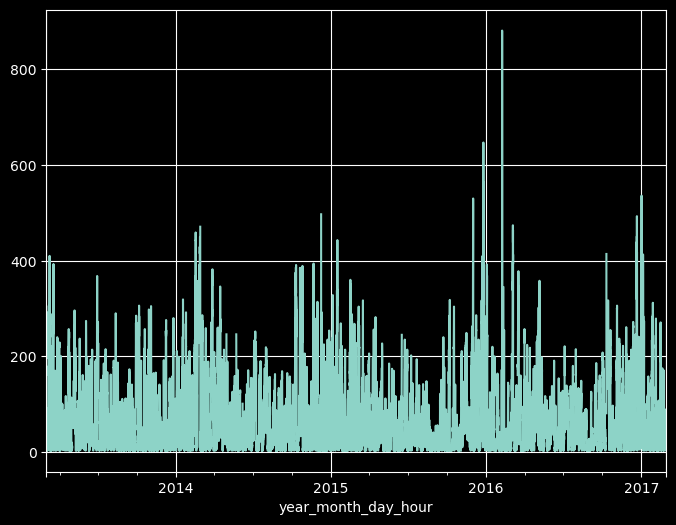

In [55]:
pm_data.plot(grid=True)

* **Let's Analysis by year**

<AxesSubplot: xlabel='year_month_day_hour'>

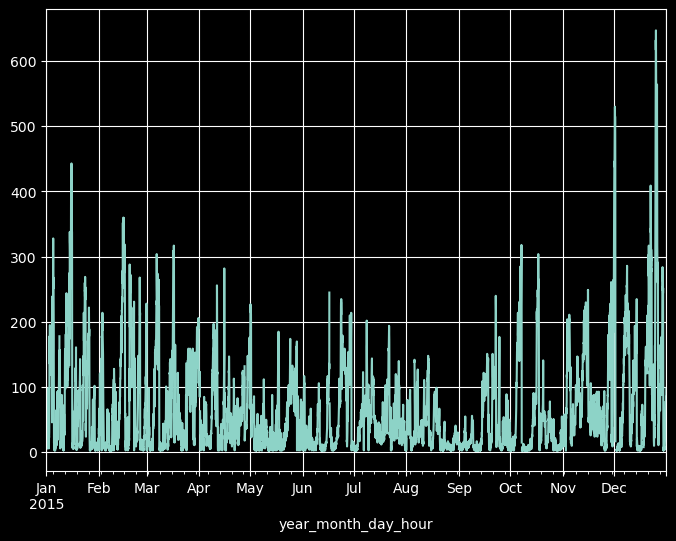

In [56]:
df2_2015=df2.loc['2015']
pm_data_2015=df2_2015['PM2.5']
pm_data_2015.plot(grid=True)

* **Let's see 2016 data**

<AxesSubplot: xlabel='year_month_day_hour'>

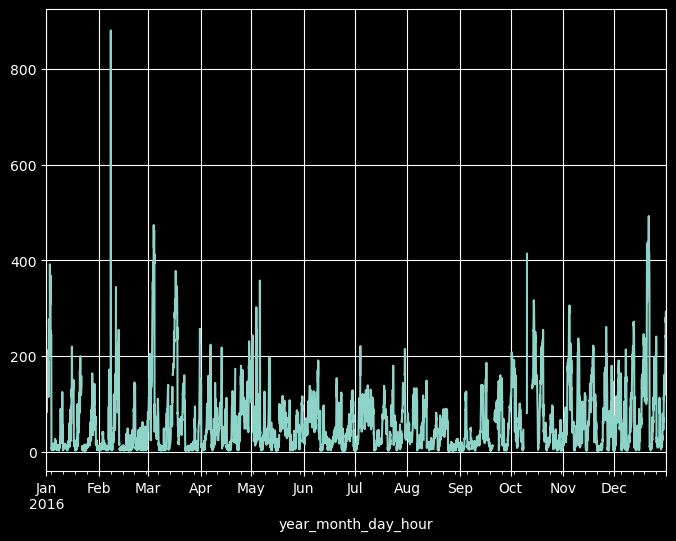

In [57]:
df2_2016=df2['2016']
pm_data_2016=df2_2016['PM2.5']
pm_data_2016.plot(grid=True)

In [58]:
import plotly.express as px
fig = px.line(df2_non_index, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [59]:
fig = px.line(df2_non_index, x='year_month_day_hour', y='PM2.5', title='PM2.5 with Slider')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

Text(0.5, 1.0, 'Air Quality plot for the year 2014 and 2015')

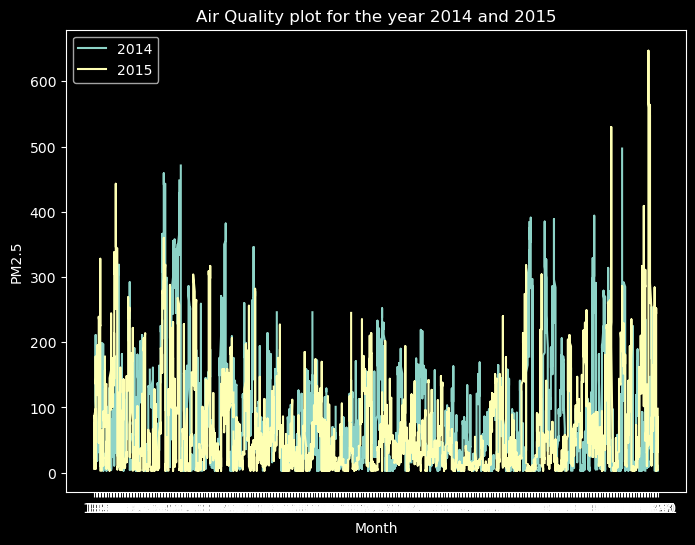

In [60]:
df2_2014= df2['2014'].reset_index()
df2_2015 = df2['2015'].reset_index()
df2_2014['month_day_hour']=df2_2014.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
df2_2015['month_day_hour']=df2_2015.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
plt.plot(df2_2014['month_day_hour'], df2_2014['PM2.5'])
plt.plot(df2_2015['month_day_hour'], df2_2015['PM2.5'])
plt.legend(['2014', '2015'])
plt.xlabel('Month')
plt.ylabel('PM2.5')
plt.title('Air Quality plot for the year 2014 and 2015')

In [62]:
df2['2014':'2016'][['month','PM2.5']].groupby('month').describe()

PM2.5                                                       
        count       mean         std  min   25%   50%     75%    max
month                                                               
1      2173.0  70.285274   75.913587  3.0  12.0  38.0  113.00  443.0
2      1978.0  86.389282  105.603069  3.0  10.0  33.0  132.00  881.0
3      2212.0  80.193852   87.889440  3.0  13.0  47.0  123.25  474.0
4      2105.0  67.963325   56.430235  3.0  25.0  54.0   95.00  346.0
5      2188.0  47.994378   44.843130  3.0  16.0  35.0   67.00  358.0
6      2119.0  46.655403   43.877349  3.0  13.0  31.0   69.00  245.0
7      2205.0  61.671474   50.926149  3.0  21.0  48.0   91.00  252.0
8      2206.0  41.364869   37.279312  3.0  13.0  29.0   60.00  217.0
9      2074.0  45.356123   43.235331  3.0  11.0  27.0   78.00  240.0
10     2081.0  82.586257   92.234361  3.0  13.0  43.0  124.00  414.0
11     2141.0  77.500140   71.720648  3.0  20.0  56.0  112.00  394.0
12     2186.0  87.990851  104.677021  3.0  11.0  48.5  135.00  647.0

In [63]:
df2['2014':'2016'][['month','PM2.5','TEMP']].groupby('month').agg({'PM2.5':['max'],'TEMP':['min','max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.4
2      881.0 -10.9  14.0
3      474.0  -6.4  26.0
4      346.0   1.3  32.0
5      358.0   7.0  41.4
6      245.0  15.1  38.1
7      252.0  16.8  39.2
8      217.0  16.6  36.3
9      240.0   7.8  34.5
10     414.0  -1.4  28.1
11     394.0 -10.3  20.8
12     647.0  -9.7  11.6

array([<AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>], dtype=object)

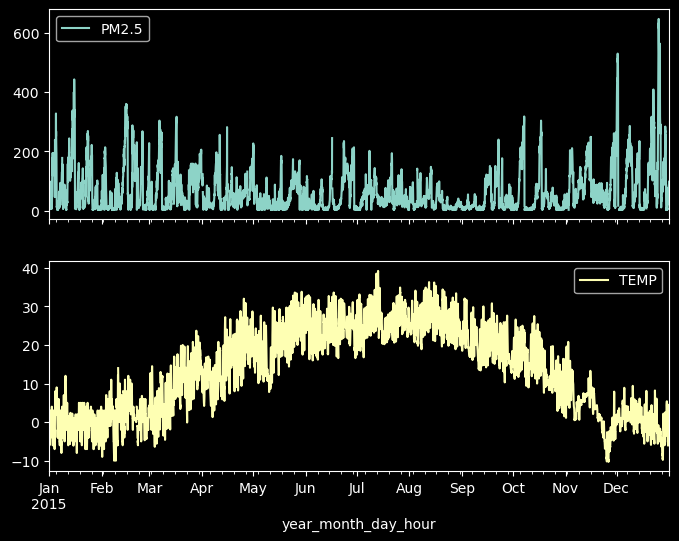

In [64]:
df2_2015=df2['2015']
pm_data_2015=df2_2015[['PM2.5','TEMP']]
pm_data_2015.plot(subplots=True)

array([[<AxesSubplot: title={'center': 'PM2.5'}>,
        <AxesSubplot: title={'center': 'TEMP'}>]], dtype=object)

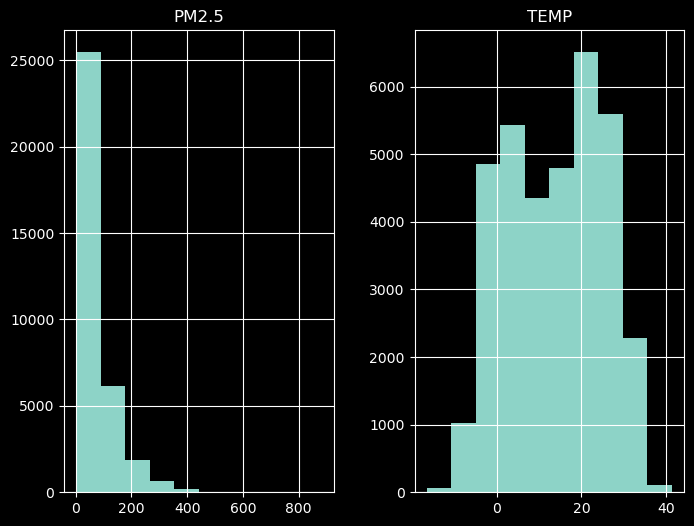

In [65]:
df2[['PM2.5','TEMP']].hist()

<AxesSubplot: ylabel='Density'>

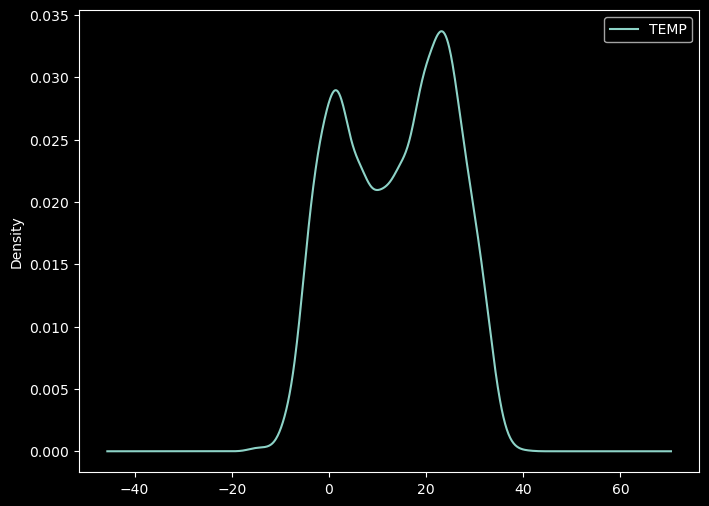

In [66]:
df2[['TEMP']].plot(kind='density')

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

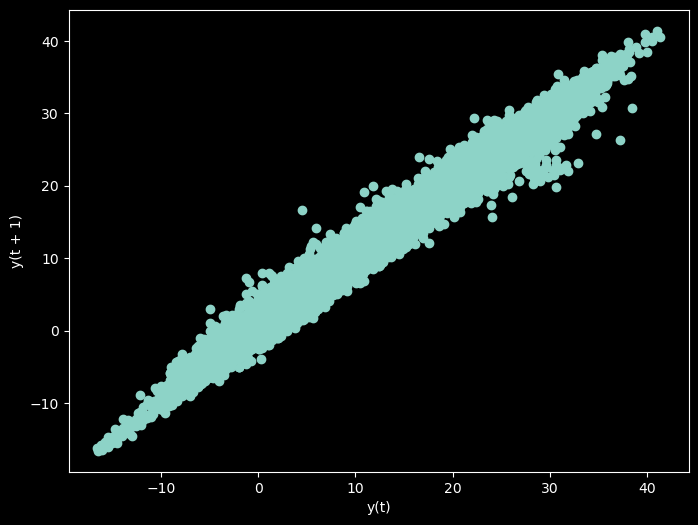

In [68]:
pd.plotting.lag_plot(df2['TEMP'],lag=1)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 10)'>

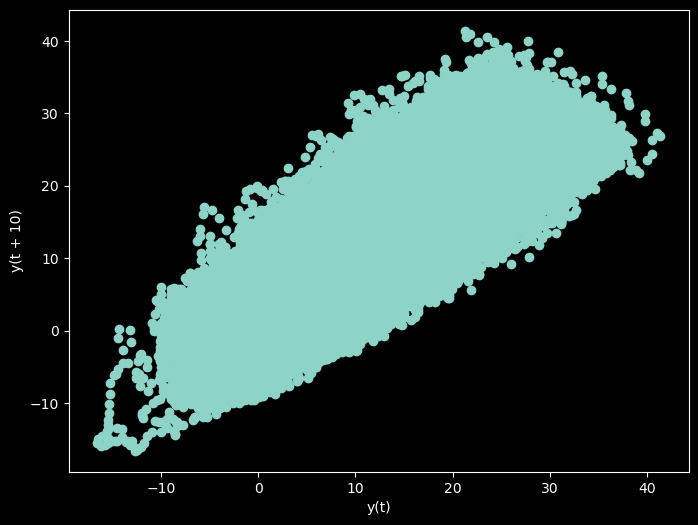

In [70]:
pd.plotting.lag_plot(df2['TEMP'],lag=10)

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 2150)'>

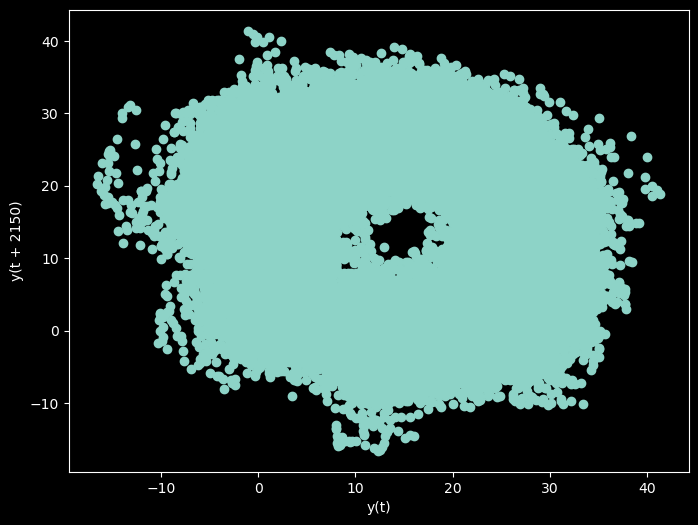

In [71]:
pd.plotting.lag_plot(df2['TEMP'],lag=2150)

array([<AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>], dtype=object)

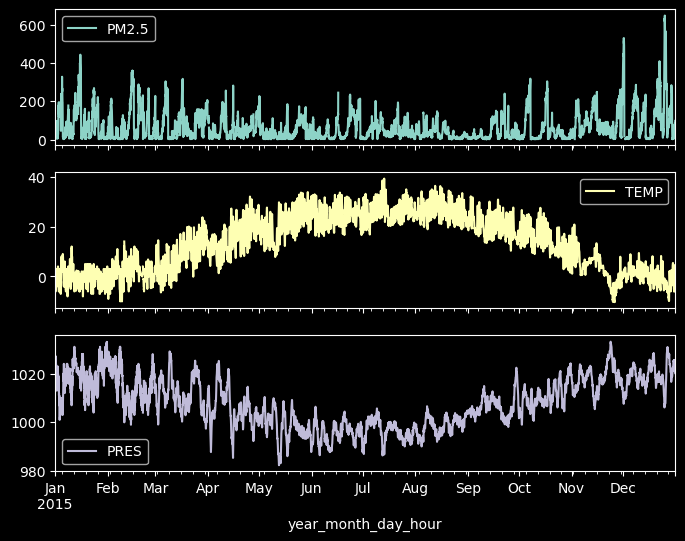

In [72]:
df2_2015=df2['2015']
pm_data_2015=df2_2015[['PM2.5','TEMP','PRES']]
pm_data_2015.plot(subplots=True)

array([<AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>], dtype=object)

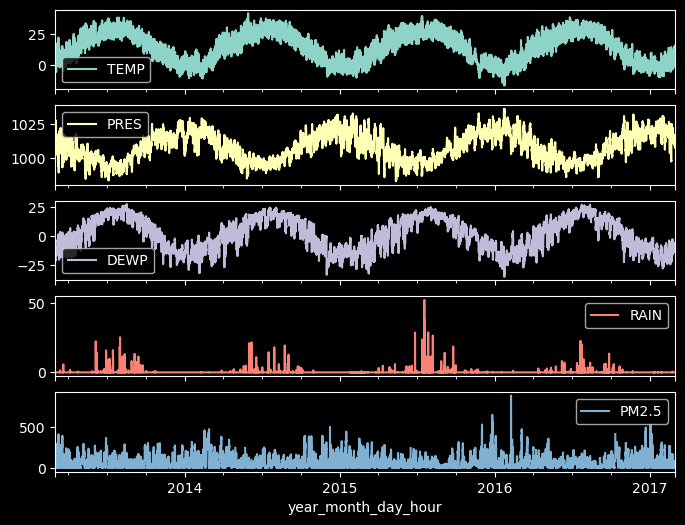

In [73]:
multi_data = df2[['TEMP','PRES','DEWP', 'RAIN','PM2.5']]
multi_data.plot(subplots=True)

array([<AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>,
       <AxesSubplot: xlabel='year_month_day_hour'>], dtype=object)

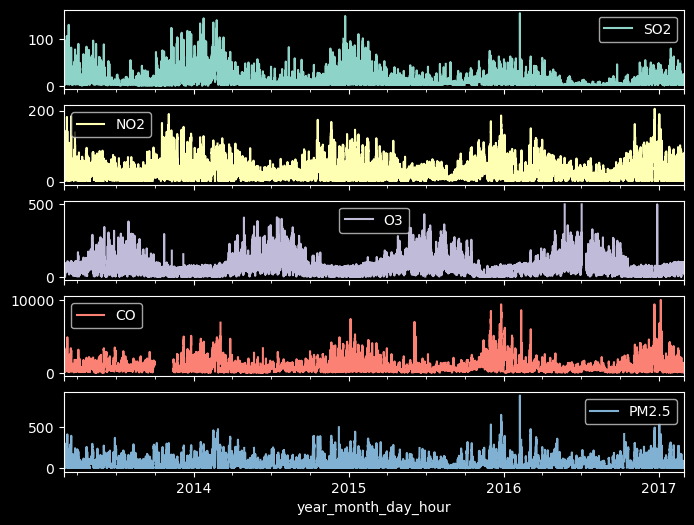

In [74]:
multi_data = df2[['SO2','NO2','O3', 'CO','PM2.5']]
multi_data.plot(subplots=True)

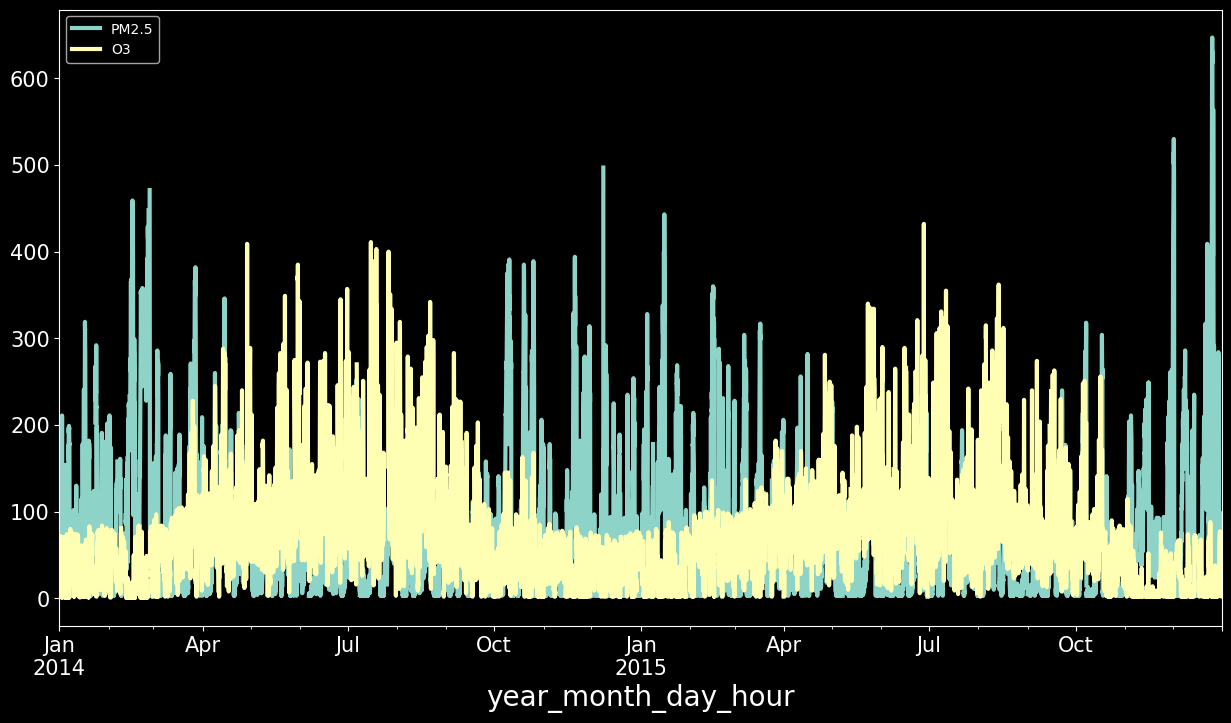

In [77]:
df2['2014':'2015'][['PM2.5','O3']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('year_month_day_hour', fontsize=20);

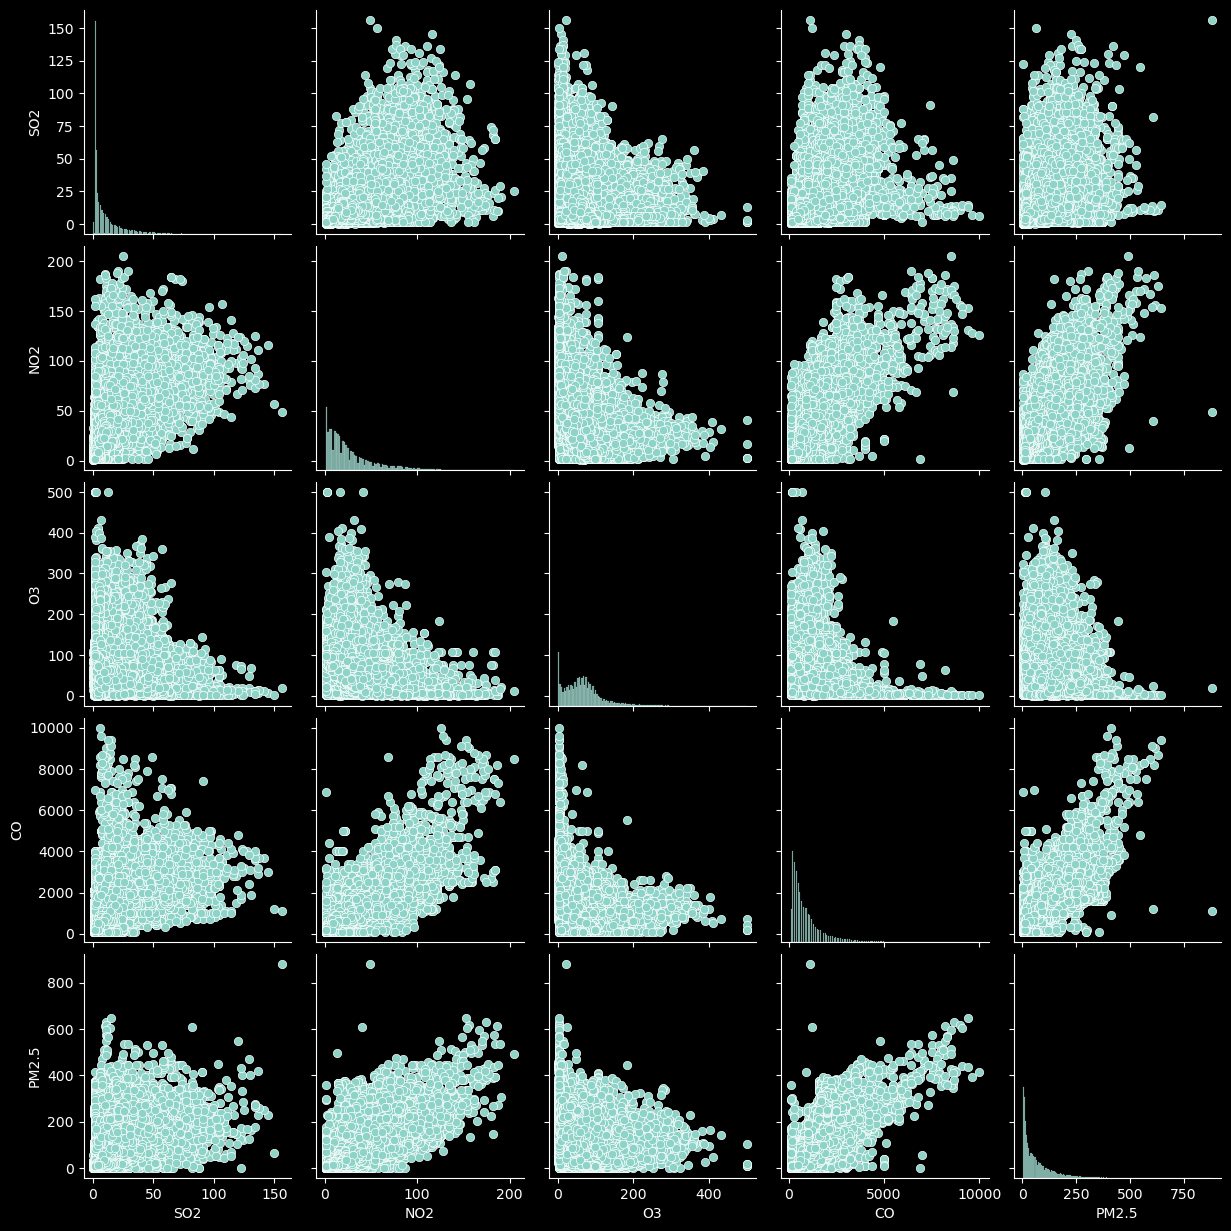

In [79]:
g=sns.pairplot(df2[['SO2','NO2','O3','CO','PM2.5']])

In [80]:
aq_corr=df2[['SO2','NO2','O3', 'CO','PM2.5']].corr(method='pearson')
aq_corr

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

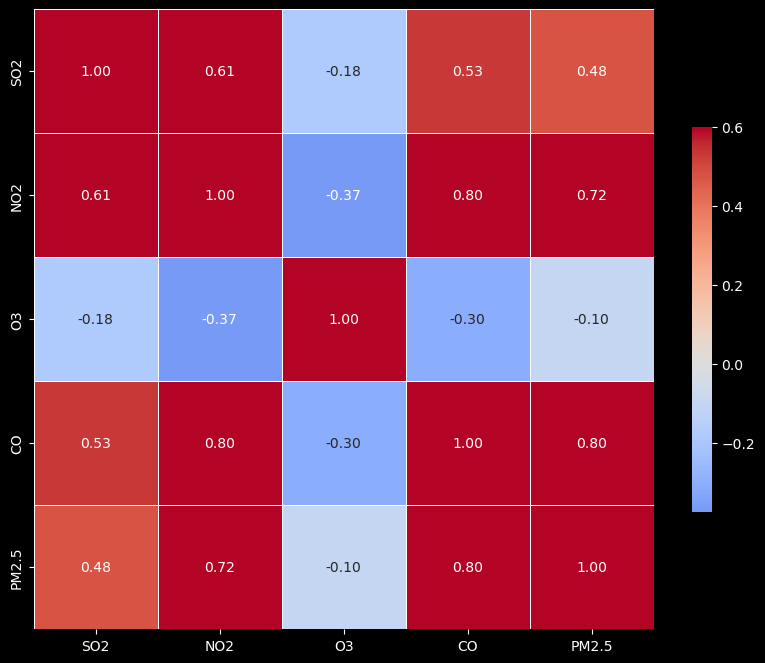

In [81]:
g = sns.heatmap(aq_corr,  vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(10,10)
    
plt.show()

In [82]:
df2.groupby('wd').agg(median=('PM2.5','median'),mean=('PM2.5','mean'),max=('PM2.5','max'), min=('PM2.5','min')).reset_index()

wd  median       mean    max  min
0     E    70.0  88.623363  434.0  3.0
1   ENE    56.5  77.685514  647.0  3.0
2   ESE    78.5  96.492276  632.0  3.0
3     N    29.0  57.546221  536.0  3.0
4    NE    32.0  57.390083  530.0  3.0
5   NNE    26.0  53.946239  881.0  3.0
6   NNW    33.0  62.790775  548.0  3.0
7    NW    21.0  52.769116  535.0  3.0
8     S    52.0  72.497281  511.0  3.0
9    SE    70.0  85.045709  617.0  3.0
10  SSE    61.0  79.925967  614.0  3.0
11  SSW    50.0  73.078253  493.0  3.0
12   SW    46.0  70.233140  459.0  3.0
13    W    22.0  49.488104  446.0  3.0
14  WNW    14.0  37.307447  515.0  3.0
15  WSW    39.0  66.725926  451.0  3.0

In [83]:
df2_na=df2.copy()

In [87]:
df2_na=df2_na.dropna()

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

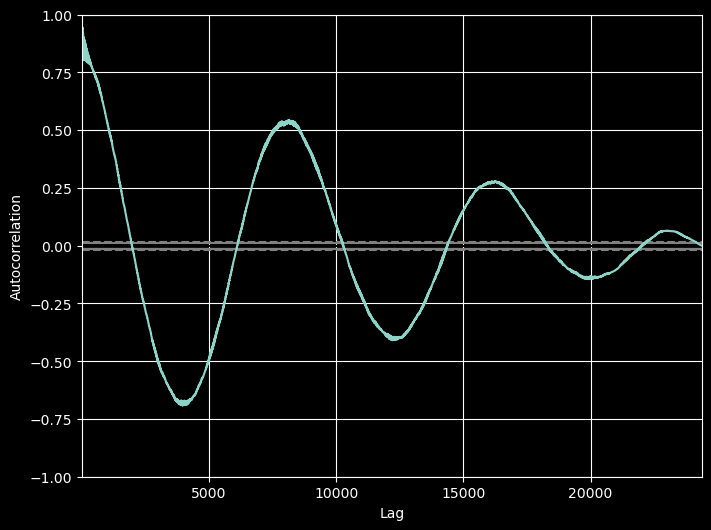

In [88]:
pd.plotting.autocorrelation_plot(df2_na['2014':'2016']['TEMP'])

In [89]:
df2_na['TEMP'].resample('1m').mean()

year_month_day_hour
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

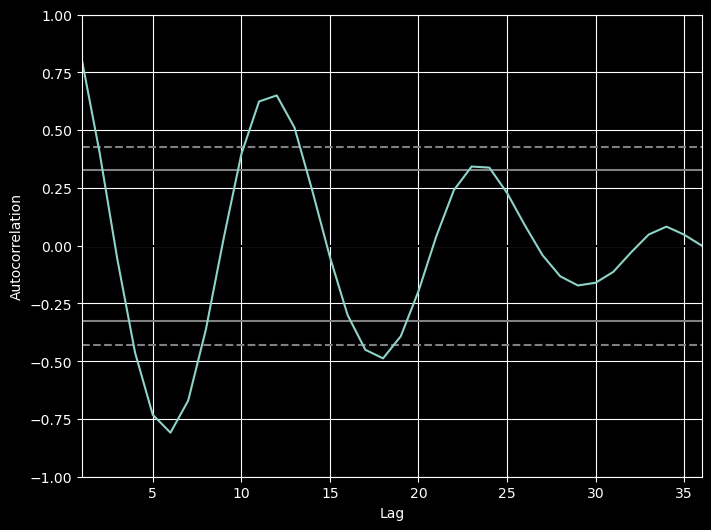

In [90]:
pd.plotting.autocorrelation_plot(df2_na['2014':'2016']['TEMP'].resample("1m").mean())

<AxesSubplot: xlabel='Lag', ylabel='Autocorrelation'>

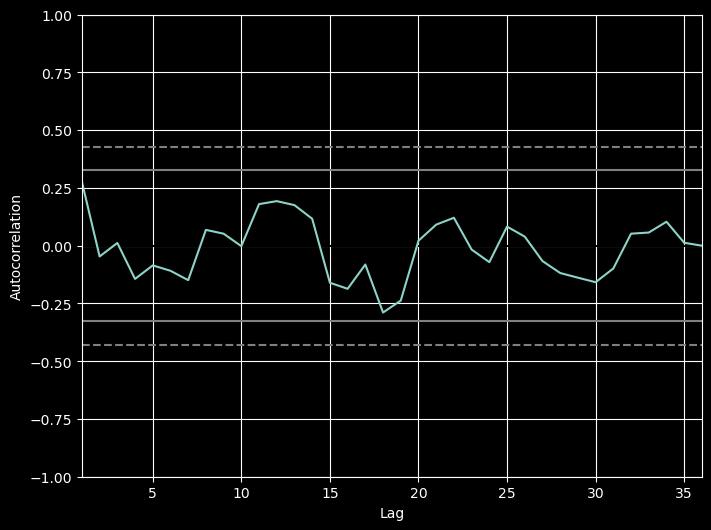

In [91]:
pd.plotting.autocorrelation_plot(df2_na['2014':'2016']['PM2.5'].resample("1m").mean())